 <h1 align="center" style="color:#4ca8ed">
    Обробка та аналіз БМД.<br>
    Группа: БС-81<br>
    Мумінов А.O.<br>
    Практикум Номер 7
</h1>

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


<p style="color:#4ca8ed;font-size:150%">
    1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані повинні відповідати вимогам
</p>

In [18]:
database = pd.read_csv("resources/at.csv",encoding = 'utf-8')
database['Location'] = ['Oslo' if 'Uluru' else x for x in database['Location'] ]
database['Location'] = ['Stockholm' if 'Albury' else x for x in database['Location'] ]

database['Location'] = ['Hannover' if 'Syney' else x for x in database['Location'] ]

database

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Hannover,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Hannover,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Hannover,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Hannover,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Hannover,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Hannover,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Hannover,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Hannover,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Hannover,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


<p style="color:#4ca8ed;font-size:150%">
    2. Побудувати графік, що відображає розкид даних в групах.
</p>

0  0


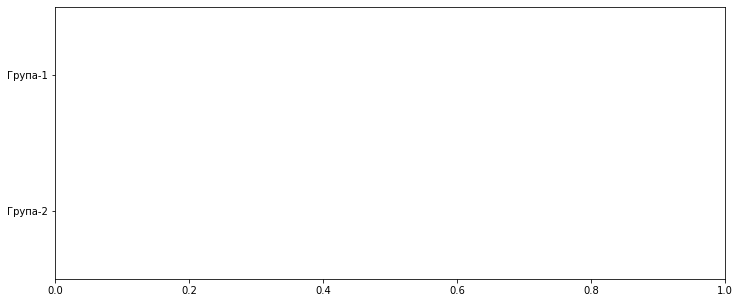

In [21]:
group1 = []
group2 = []
val = 11
cond = 1

j = 0 

for i in range(len(database)):
#     group1.append(database.iloc[i,val]) if (database.iloc[i,cond] != "Vegetarian") else group2.append(database.iloc[i,val])
    if(database.iloc[i,cond] == "Stockholm"):
        j += 1
        group1.append(database.iloc[i,val])
    elif(database.iloc[i,cond] == "Hannover"):
        group2.append(database.iloc[i,val])
    if(j > 150):
        break

print(str(len(group1))+"  "+str(len(group2)))
data = pd.DataFrame({
     'Група-1': group1[0:(len(group2))] if(len(group1)> len(group2)) else group1,
     'Група-2': group2[0:(len(group1))] if(len(group2)> len(group1)) else group2
})
# data
fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(orient = "h",data = data, palette="pastel")

<p style="color:#4ca8ed;font-size:150%">
    3.для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).
</p>

In [13]:
def Liveni(data):
    df = len(data)-1
    table = []; 
    print("df - "+str(df))
    if(df > 20):
        table = pd.read_excel("resources/Liveni.xlsx",encoding = 'utf-8').iloc[21,12]    #Таблица
    elif(df > 15):
        table = pd.read_excel("resources/Liveni.xlsx",encoding = 'utf-8').iloc[df,11]    #Таблица
    elif(df > 10):
        table = pd.read_excel("resources/Liveni.xlsx",encoding = 'utf-8').iloc[df,10]    #Таблица
    else:
        table = pd.read_excel("resources/Liveni.xlsx",encoding = 'utf-8').iloc[df,df]    #Таблица
    
    std1 = np.std(data.iloc[:,0]);
    std2 = np.std(data.iloc[:,1]);
    F = std1**2/std2**2 if(std1 > std2) else std2**2/std1**2
    significant = "not significant" if(F > table) else "significant"
    
    print("table value - "+str(table))
    return F,df,significant
    

In [14]:
result_Liveni = Liveni(data)
result_Liveni

df - 150
table value - 1.45


(1.298628483663365, 150, 'significant')

<p style="color:#4ca8ed;font-size:150%">
    4.для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).
</p>

In [15]:
def student(data, liv): #True if(result_Liveni[2] == "significant") else False
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    
    m1 = np.mean(data.iloc[:,0])
    m2 = np.mean(data.iloc[:,1])
    
    n = len(data)
    
    df = 2*n - 2
    table_values= pd.read_excel("resources/Student.xlsx",encoding = 'utf-8')    #Таблица корреляционных значений
    table_val = 0
    for i in range(len(table_values)):
        if(df < int(table_values.iloc[i,0])):
            if(df != table_values.iloc[i-1,0]):
                table_val = (table_values.iloc[i-1,1] if((table_values.iloc[i,0]-df) >= abs(table_values.iloc[i-1,0]-df)) else table_values.iloc[i,1])
                break
            else:
                table_val = table_values.iloc[i-1,1]
                break
    
    print("df - "+str(df))
    print("table value - "+str(table_val))
    t = 0
    
    if (liv[2] == "significant"):
        t = abs(m1-m2)/np.sqrt(std1**2/n + std2**2/n)
    else:
        t = abs(m1-m2)/np.sqrt(((n-1)*(std1**2) + (n-1)*(std2**2))/(df)*(2/n))
    
    significant = "significant" if(t < table_val) else "not significant"
    return t,df,significant
    

In [16]:
result_student = student(data,result_Liveni)
result_student

df - 300
table value - 1.968


(1.2264774600987303, 300, 'significant')

<p style="color:#4ca8ed;font-size:150%">
    5.Перевірити розбіжність на між групами на даних з п. 1.
</p>

In [8]:
table = pd.DataFrame({
    "Критерій Лівені":result_Liveni,
    "Критерій Стьюдента":result_student
}, index = ["Значення", "ступінь свободи", "Значимість зв'язку"])
table

,Критерій Лівені,Критерій Стьюдента
Значення,1.29863,1.22648
ступінь свободи,150,300
Значимість зв'язку,significant,significant


<p style="color:#4ca8ed;font-size:150%">
    6.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.
</p>

In [9]:
if(table.iloc[2,0] == "significant"):
    print("Дисперсії статистично рівні")
else:
    print("Дисперсії статистично відмінні")
          
if(table.iloc[2,1] == "significant"):
    print("Середні статистично рівні")
else:
    print("Середні статистично відмінні")

Дисперсії статистично рівні
Середні статистично рівні
